# Import

In [1]:
# Import cell 
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
def save_excel(file, path, file_name, file_type):
    with pd.ExcelWriter(f'{path}/{file_name}.{file_type}', engine = 'openpyxl') as writer:
        for sheet_name, df in file.items():
            df.to_excel(writer, sheet_name = sheet_name, index = False)

In [3]:
!pip install openpyxl

In [4]:
base_path = "/Users/Mahdi/quera_ai/projects/project1/Project1_data"

In [5]:
u99 = pd.read_excel(base_path + "/U99.xlsx", sheet_name=None, engine = 'openpyxl')

In [6]:
U99 = u99.copy()

In [7]:
file_list = [u99]
file_names = ['U99']

# U99Data

In [8]:
print(u99['U99Data'].columns)
u99['U99Data'] = u99['U99Data'][['Address', 'Fasl', 'weight', 'khanevartype', 'province','town']]

Index(['Address', 'MahMorajeh', 'Fasl', 'weight', 'khanevartype', 'Takmil',
       'TakmilDescA', 'TakmilDescB', 'TakmilDescC', 'Jaygozin',
       'JaygozinDescA', 'JaygozinDescB', 'JaygozinDescC', 'BlkAbdJaygozin',
       'RadifJaygozin', 'IsTel', 'FVam', 'province', 'town'],
      dtype='object')


In [9]:
u99['U99Data'].isna().mean()*100

Address         0.0
Fasl            0.0
weight          0.0
khanevartype    0.0
province        0.0
town            0.0
dtype: float64

# U99P1

In [10]:
u99['U99P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           8.153382
studying          18.402217
degree            18.402217
occupationalst    14.549386
maritalst         14.547863
dtype: float64

In [11]:
u99['U99P1']['age'] = u99['U99P1']['age'].astype(int)

In [12]:
max_age_illiterate = max(u99['U99P1'][u99['U99P1']['literacy'].isna()]['age'])
print(max_age_illiterate)
if max_age_illiterate > 6:
    max_age_illiterate = 6
u99['U99P1'].loc[(u99['U99P1']['literacy'].isna()) & (u99['U99P1']['age'] <= max_age_illiterate), 'literacy'] = 'illiterate'
u99['U99P1'].loc[(u99['U99P1']['studying'].isna()) & (u99['U99P1']['age'] <= max_age_illiterate), 'studying'] = 'No'

6


In [13]:
u99['U99P1'].loc[(u99['U99P1']['studying'].isna()) & (u99['U99P1']['literacy'] == 'illiterate'), 'studying'] = 'No'

In [14]:
u99['U99P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree            18.402217
occupationalst    14.549386
maritalst         14.547863
dtype: float64

In [15]:
u99['U99P1'].loc[(u99['U99P1']['studying'] == 'No') & (u99['U99P1']['degree'] == 'Other') & (u99['U99P1']['literacy'] == 'illiterate')]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst


In [16]:
u99['U99P1'].loc[(u99['U99P1']['literacy'] == 'illiterate'), 'degree'].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
u99['U99P1'].loc[(u99['U99P1']['literacy'] == 'illiterate'), 'degree'] = 'No degree'

In [18]:
u99['U99P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree             0.000000
occupationalst    14.549386
maritalst         14.547863
dtype: float64

In [19]:
u99['U99P1'].loc[u99['U99P1']['occupationalst'].isna(), 'occupationalst'] = 'Other'

In [20]:
u99['U99P1']['maritalst'].value_counts()

maritalst
Married     33624
Single      18705
Widowed      2844
Divorced      940
Name: count, dtype: int64

In [21]:
u99['U99P1'].loc[(u99['U99P1']['maritalst'].isna())]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
2,10006005929,3,Child,Male,2,illiterate,No,No degree,Other,NaN
7,10005004618,3,Child,Male,3,illiterate,No,No degree,Other,NaN
10,10006005920,3,Child,Male,5,illiterate,No,No degree,Other,NaN
31,10003003218,3,Child,Male,8,literate,Yes,Elemantry,Other,NaN
34,10003003219,3,Child,Female,5,illiterate,No,No degree,Other,NaN
...,...,...,...,...,...,...,...,...,...,...
65603,13001371017,3,Child,Male,3,illiterate,No,No degree,Other,NaN
65621,13002380629,6,Child,Male,5,illiterate,No,No degree,Other,NaN
65649,13006382717,4,Child,Female,4,illiterate,No,No degree,Other,NaN
65652,13006382723,3,Child,Male,9,literate,Yes,Elemantry,Other,NaN


In [22]:
max_age_single = max(u99['U99P1'].loc[(u99['U99P1']['maritalst'].isna()), 'age'])
u99['U99P1'].loc[(u99['U99P1']['maritalst'].isna()) & (u99['U99P1']['relation'] == 'Child'), 'maritalst'] = 'Single'

In [23]:
u99['U99P1'].loc[(u99['U99P1']['maritalst'].isna()) & (u99['U99P1']['age'] <= max_age_single), 'maritalst'] = 'Single'

In [24]:
u99['U99P1'].isna().mean()*100

Address           0.0
member            0.0
relation          0.0
gender            0.0
age               0.0
literacy          0.0
studying          0.0
degree            0.0
occupationalst    0.0
maritalst         0.0
dtype: float64

# U99P2

In [25]:
missing_value_u99p2 = pd.DataFrame(u99['U99P2'].isna().mean()*100)
missing_value_u99p2 = missing_value_u99p2.reset_index()
missing_value_u99p2.columns = ['feature', 'percentage']
missing_value_u99p2[missing_value_u99p2['percentage'] > 0]

,feature,percentage
5,material,39.946131
43,heatingfuel,2.387859
44,waterheatingfuel,0.492075


In [26]:
cookingfuel_count = pd.DataFrame(u99['U99P2']['cookingfuel'].value_counts()).reset_index()
cookingfuel_count.columns = ['cookingfuel', 'count']
common_cookingfuel = cookingfuel_count.iloc[0, 0]

heatingfuel_count = pd.DataFrame(u99['U99P2']['heatingfuel'].value_counts()).reset_index()
heatingfuel_count.columns = ['heatingfuel', 'count']
common_heatingfuel = heatingfuel_count.iloc[0, 0]

waterheatingfuel_count = pd.DataFrame(u99['U99P2']['waterheatingfuel'].value_counts()).reset_index()
waterheatingfuel_count.columns = ['waterheatingfuel', 'count']
common_waterheatingfuel = waterheatingfuel_count.iloc[0, 0]

In [27]:
u99['U99P2'].loc[u99['U99P2']['cookingfuel'].isna(), 'cookingfuel'] = common_cookingfuel
u99['U99P2'].loc[u99['U99P2']['heatingfuel'].isna(), 'heatingfuel'] = common_heatingfuel
u99['U99P2'].loc[u99['U99P2']['waterheatingfuel'].isna(), 'waterheatingfuel'] = common_waterheatingfuel


In [28]:
missing_value_u99p2 = pd.DataFrame(u99['U99P2'].isna().mean()*100)
missing_value_u99p2 = missing_value_u99p2.reset_index()
missing_value_u99p2.columns = ['feature', 'percentage']
missing_value_u99p2[missing_value_u99p2['percentage'] > 0]

,feature,percentage
5,material,39.946131


Question is : Is there any way to fill material ? Is it valuable ?

# U99P3S01

In [29]:
u99['U99P3S01'].isna().mean()*100

Address       0.000000
code          0.000000
purchased     0.000000
gram         74.443245
kilogram     24.768371
price         9.037607
value         0.000000
dtype: float64

In [30]:
print(u99['U99P3S01'].columns)

u99['U99P3S01'].loc[(u99['U99P3S01']['kilogram'].isna()) & (~u99['U99P3S01']['price'].isna()), 'kilogram'] = u99['U99P3S01']['value'] / u99['U99P3S01']['price']


u99['U99P3S01'].loc[(~u99['U99P3S01']['kilogram'].isna()) & (u99['U99P3S01']['price'].isna()), 'price'] = u99['U99P3S01']['value'] / u99['U99P3S01']['kilogram']


u99['U99P3S01'] = u99['U99P3S01'].loc[~u99['U99P3S01']['kilogram'].isna() | ~u99['U99P3S01']['price'].isna()]


Index(['Address', 'code', 'purchased', 'gram', 'kilogram', 'price', 'value'], dtype='object')


In [31]:
print(u99['U99P3S01'].isna().mean()*100)

Address       0.000000
code          0.000000
purchased     0.000000
gram         71.904224
kilogram      0.000000
price         0.000000
value         0.000000
dtype: float64


In [32]:
u99['U99P3S01'] = u99['U99P3S01'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(u99['U99P3S01'].columns)


Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# U99P3S02

In [33]:
u99['U99P3S02'].isna().mean()*100


Address        0.000000
code           0.000000
purchased      0.000000
gram         100.000000
kilogram      15.591398
price         15.654649
value          0.000000
dtype: float64

In [34]:
u99['U99P3S02']['value'] = pd.to_numeric(u99['U99P3S02']['value'], errors='coerce')
u99['U99P3S02']['kilogram'] = pd.to_numeric(u99['U99P3S02']['kilogram'], errors='coerce')

In [35]:
u99['U99P3S02'].loc[(u99['U99P3S02']['kilogram'].isna()) & (~u99['U99P3S02']['price'].isna()), 'kilogram'] = u99['U99P3S02']['value'] / u99['U99P3S02']['price']
u99['U99P3S02'].loc[(~u99['U99P3S02']['kilogram'].isna()) & (u99['U99P3S02']['price'].isna()), 'price'] = u99['U99P3S02']['value'] / u99['U99P3S02']['kilogram']
u99['U99P3S02'] = u99['U99P3S02'].loc[~u99['U99P3S02']['kilogram'].isna() | ~u99['U99P3S02']['price'].isna()]

In [36]:
u99['U99P3S02'].isna().mean()*100


Address        0.0
code           0.0
purchased      0.0
gram         100.0
kilogram       0.0
price          0.0
value          0.0
dtype: float64

In [37]:
u99['U99P3S02'] = u99['U99P3S02'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(u99['U99P3S02'].columns)

Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# U99P3S04

In [38]:
u99['U99P3S04'].isna().mean()*100

Address       0.000000
code          0.000000
mortgage     96.027454
purchased    16.269770
value         0.000000
dtype: float64

Question is : Is there any way to fill purchased & mortgage ?

In [39]:
u99['U99P3S04']['purchased'].value_counts()

purchased
1    68256
8     1560
3      154
5      106
2       30
        21
7       16
4        2
Name: count, dtype: int64

In [40]:
u99['U99P3S04'].loc[(u99['U99P3S04']['purchased'].isna()) & (~u99['U99P3S04']['mortgage'].isna())]

,Address,code,mortgage,purchased,value


In [41]:
u99['U99P3S04'].loc[u99['U99P3S04']['purchased'].isna(), 'code'].value_counts()

code
42111    13609
42211       21
Name: count, dtype: int64

In [42]:
pd.set_option('display.max_rows', None)
grouped = u99['U99P3S04'].groupby('Address').filter(lambda x: ((x['code'] == 41111).any()) | ((x['code'] == 41112).any()))
print(grouped[((grouped.code == 41111) | (grouped.code == 41111) | (grouped.code == 42111) | (grouped.code == 42211))])
pd.reset_option('display.max_rows')

           Address   code  mortgage purchased     value
9      10011009714  41111       NaN         1   2000000
27     10006005929  41111       NaN         1   6000000
32     10006005920  41111       NaN         1   5000000
38     10005004617  41111       NaN         1   9500000
47     10007007217  41111       NaN         1   3000000
52     10003003219  41111       NaN         1   5000000
58     10003003218  41111       NaN         1   4500000
86     10006005918  41111       NaN         1   5000000
106    10007007219  41111       NaN         1   2000000
120    10001001929  41111       NaN         1   7000000
192    10006005522  41111       NaN         1   6000000
220    10004004217  41111       NaN         1   4000000
285    10001001523  41111       NaN         1   4200000
335    10005005129  41111       NaN         1   3000000
340    10005005124  41111       NaN         1   3000000
345    10010008929  41111       NaN         1   2000000
351    10010008915  41111       NaN         1   

# U99P3S[03 + 05 - 12]

In [43]:
# All files are clean except U99P3S10
# U99P3S10 is empty

u99['U99P3S10']

,Address,code,purchased,value


# U99P3S13

In [44]:
print(u99['U99P3S13'].isna().mean()*100)
print(f"len u99['U99P3S13'] = {len(u99['U99P3S13'])}")
print(f"len nan value in u99['U99P3S13'] = {len(u99['U99P3S13'][u99['U99P3S13']['value'].isna()])}")
u99['U99P3S13'][u99['U99P3S13']['value'].isna()]

Address    0.000000
code       0.000000
value      0.332001
dtype: float64
len u99['U99P3S13'] = 220481
len nan value in u99['U99P3S13'] = 732


,Address,code,value
50,10006005926,123111,NaN
479,10001001916,123111,NaN
1066,10012010115,123111,NaN
1734,10003003226,123111,NaN
1991,10103013614,123111,NaN
...,...,...,...
218363,12906364020,123111,NaN
219608,13001373820,123111,NaN
219704,13001373826,123111,NaN
219743,13001373129,123111,NaN


Fill Null values with median

In [45]:
u99['U99P3S13'].loc[u99['U99P3S13']['value'] == '          ', 'value'] = None
u99['U99P3S13']['value'] = u99['U99P3S13']['value'].astype('float64')
p3s13_median = u99['U99P3S13'][~u99['U99P3S13']['value'].isna()]['value'].median()
u99['U99P3S13']['value'] = u99['U99P3S13']['value'].fillna(p3s13_median)

Question is : Is there any way to fill value ?

# U99P3S14

In [46]:
u99['U99P3S14'].isna().mean()*100

Address      0.000000
code         0.000000
purchased    3.880704
value        3.988502
dtype: float64

Question is : Is there any way to fill purchased & value ?

# U99P4S01

In [47]:
u99['U99P4S01'].isna().mean()*100

Address            0.000000
member             0.000000
employed_w         0.000000
ISCO_w             0.000000
ISIC_w             0.000000
status_w           0.000000
hours_w            6.605941
days_w             6.589529
income_w_m         0.000000
income_w_y         0.000000
wage_w_m           0.049237
wage_w_y           0.000000
perk_w_m           0.024618
perk_w_y           0.000000
netincome_w_m      0.000000
netincome_w_y      0.000000
Fasl               0.000000
year               0.000000
DYCOL00          100.000000
dtype: float64

In [48]:
U99_P4S01_mahdi = u99['U99P4S01'][['Address', 'member', 'employed_w', 'ISCO_w', 'ISIC_w', 'status_w' , 'hours_w', 'days_w','income_w_y', 'wage_w_y', 'perk_w_y', 'netincome_w_y', 'Fasl', 'year']]
U99_P4S01_mahdi.isna().mean()*100

Address          0.000000
member           0.000000
employed_w       0.000000
ISCO_w           0.000000
ISIC_w           0.000000
status_w         0.000000
hours_w          6.605941
days_w           6.589529
income_w_y       0.000000
wage_w_y         0.000000
perk_w_y         0.000000
netincome_w_y    0.000000
Fasl             0.000000
year             0.000000
dtype: float64

In [49]:
print(U99_P4S01_mahdi[U99_P4S01_mahdi['wage_w_y'].isna()].index)
print(U99_P4S01_mahdi[U99_P4S01_mahdi['perk_w_y'].isna()].index)
U99_P4S01_mahdi[(U99_P4S01_mahdi['perk_w_y'].isna()) | (U99_P4S01_mahdi['wage_w_y'].isna())]

Index([], dtype='int64')
Index([], dtype='int64')


,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year


In [50]:
U99_P4S01_mahdi = U99_P4S01_mahdi[~U99_P4S01_mahdi['hours_w'].isna()]
U99_P4S01_mahdi = U99_P4S01_mahdi[~U99_P4S01_mahdi['days_w'].isna()]

In [51]:
X = U99_P4S01_mahdi[(~U99_P4S01_mahdi['perk_w_y'].isna()) & (~U99_P4S01_mahdi['wage_w_y'].isna())].drop(['Address', 'member', 'wage_w_y', 'perk_w_y'], axis = 1)
y1 = U99_P4S01_mahdi[(~U99_P4S01_mahdi['perk_w_y'].isna()) & (~U99_P4S01_mahdi['wage_w_y'].isna())]['wage_w_y']
y2 = U99_P4S01_mahdi[(~U99_P4S01_mahdi['perk_w_y'].isna()) & (~U99_P4S01_mahdi['wage_w_y'].isna())]['perk_w_y']

X_train, X_validation, y1_train, y1_validation = train_test_split(X, y1, test_size=0.25, random_state=42)
X_train, X_validation, y2_train, y2_validation = train_test_split(X, y2, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y1_train)
y1_pred_validation = model.predict(X_validation)
mean_squared_error_1 = mean_squared_error(y1_validation, y1_pred_validation)
r2_score_1 = r2_score(y1_validation, y1_pred_validation)
print("--- wage_w_y ---")
print(f"mean_squared_error = {mean_squared_error_1}")
print(f"r2_score = {r2_score_1}")

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- RandomForestRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

model = GradientBoostingRegressor()
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- GradientBoostingRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

--- wage_w_y ---
mean_squared_error = 822031112622192.2
r2_score = 0.9793786062778653
--- perk_w_y ---
--- RandomForestRegressor ---
mean_squared_error = 559133943129442.9
r2_score = 0.40111973677975055
--- perk_w_y ---
--- GradientBoostingRegressor ---
mean_squared_error = 610928930573377.8
r2_score = 0.3456428763689846


In [52]:
U99_P4S01_mahdi = U99_P4S01_mahdi.loc[(~U99_P4S01_mahdi['perk_w_y'].isna()) | (~U99_P4S01_mahdi['wage_w_y'].isna())]

# U99P4S02

In [53]:
u99['U99P4S02'].isna().mean()*100

Address              0.000000
member               0.000000
employed_s           0.000000
ISCO_s               0.015681
ISIC_s               0.031363
status_s             0.000000
agriculture          0.000000
hours_s              1.960169
days_s               1.944488
cost_employment     14.113219
cost_raw             3.951701
cost_machinery       7.636820
cost_others          5.096440
cost_tax            14.473891
sale                 0.784068
income_s_y           0.000000
Fasl                 0.000000
year                 0.000000
DYCOL00            100.000000
dtype: float64

In [54]:
u99['U99P4S02'].columns

Index(['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s',
       'agriculture', 'hours_s', 'days_s', 'cost_employment', 'cost_raw',
       'cost_machinery', 'cost_others', 'cost_tax', 'sale', 'income_s_y',
       'Fasl', 'year', 'DYCOL00'],
      dtype='object')

In [55]:
U99_P4S02_mahdi = u99['U99P4S02'][['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s', 'agriculture', 'sale', 'income_s_y', 'Fasl', 'year']]
U99_P4S02_mahdi = U99_P4S02_mahdi[(~U99_P4S02_mahdi['employed_s'].isna()) & (~U99_P4S02_mahdi['ISCO_s'].isna()) & (~U99_P4S02_mahdi['ISIC_s'].isna()) & (~U99_P4S02_mahdi['status_s'].isna()) & (~U99_P4S02_mahdi['agriculture'].isna())]

In [56]:
U99_P4S02_mahdi.isna().mean()*100

Address        0.000000
member         0.000000
employed_s     0.000000
ISCO_s         0.000000
ISIC_s         0.000000
status_s       0.000000
agriculture    0.000000
sale           0.784314
income_s_y     0.000000
Fasl           0.000000
year           0.000000
dtype: float64

In [57]:
print(len(U99_P4S02_mahdi[U99_P4S02_mahdi['sale'].isna()]))
print(len(U99_P4S02_mahdi[U99_P4S02_mahdi['sale'] == 0]))
print(len(U99_P4S02_mahdi[U99_P4S02_mahdi['income_s_y'].isna()]))
print(len(U99_P4S02_mahdi[U99_P4S02_mahdi['income_s_y'] == 0]))


50
376
0
389


In [58]:
U99_P4S02_mahdi[(U99_P4S02_mahdi['sale'] == 0) | (U99_P4S02_mahdi['sale'].isna())]['employed_s'].value_counts()

employed_s
1    404
2     22
Name: count, dtype: int64

In [59]:
U99_P4S02_mahdi[(U99_P4S02_mahdi['income_s_y'] == 0) | (U99_P4S02_mahdi['income_s_y'].isna())]['employed_s'].value_counts()

employed_s
1    368
2     21
Name: count, dtype: int64

In [60]:
U99_P4S02_mahdi.loc[((U99_P4S02_mahdi['income_s_y'] == 0) | (U99_P4S02_mahdi['income_s_y'].isna())) & (U99_P4S02_mahdi['employed_s'] == 2), 'income_s_y'] = 0
U99_P4S02_mahdi.loc[((U99_P4S02_mahdi['sale'] == 0) | (U99_P4S02_mahdi['sale'].isna())) & (U99_P4S02_mahdi['employed_s'] == 2), 'sale'] = 0

In [61]:
X = U99_P4S02_mahdi[~U99_P4S02_mahdi['sale'].isna()].drop(['Address', 'member', 'sale'], axis = 1)
y1 = U99_P4S02_mahdi[~U99_P4S02_mahdi['sale'].isna()]['sale']
X_train, X_validation, y_train, y_validation = train_test_split(X, y1, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

r2_score = 0.06505581755217493
r2_score = -0.22286306580758808
r2_score = 0.03768768349654261
r2_score = 0.22046122514493482


In [62]:
U99_P4S02_mahdi = U99_P4S02_mahdi[~U99_P4S02_mahdi['sale'].isna()]

# U99P4S03

In [63]:
u99['U99P4S03'].isna().mean()*100

Address              0.000000
member               0.000000
income_pension      55.141334
income_rent         68.195667
income_interest     40.271666
income_aid          22.778436
income_resale       70.971564
income_transfer     59.906060
Fasl                 0.000000
year                 0.000000
DYCOL00            100.000000
dtype: float64

In [64]:
u99_P4S03_mahdi = u99['U99P4S03'].drop(['DYCOL00'], axis = 1)

# U99_P4S04

In [65]:
u99['U99P4S04'].isna().mean()*100

Address             0.000000
member              0.000000
subsidy_number      0.007013
subsidy_month       0.000000
subsidy             0.000000
Fasl                0.000000
year                0.000000
DYCOL00           100.000000
dtype: float64

In [66]:
u99_P4S04_mahdi = u99['U99P4S04'].drop(['DYCOL00'], axis = 1)

# Mahdi's Files

In [67]:
U99_P4S01_mahdi
U99_P4S02_mahdi
u99_P4S03_mahdi
u99_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,10009008518,1,2.0,12,10920000,1,1399
1,10005004626,1,3.0,12,16380000,1,1399
2,10006005929,1,3.0,12,16380000,1,1399
3,10011009720,1,2.0,12,10920000,1,1399
4,10005004618,1,3.0,12,16380000,1,1399
...,...,...,...,...,...,...,...
28515,13001369618,1,2.0,12,10920000,4,1399
28516,13001376714,1,1.0,12,5460000,4,1399
28517,13001376714,1,1.0,12,2660000,4,1399
28518,13002381213,1,3.0,12,16380000,4,1399


# U99_P4S01

In [68]:
U99_P4S01_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11380 entries, 0 to 12185
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        11380 non-null  int64  
 1   member         11380 non-null  int64  
 2   employed_w     11380 non-null  int64  
 3   ISCO_w         11380 non-null  int64  
 4   ISIC_w         11380 non-null  int64  
 5   status_w       11380 non-null  int64  
 6   hours_w        11380 non-null  float64
 7   days_w         11380 non-null  float64
 8   income_w_y     11380 non-null  int64  
 9   wage_w_y       11380 non-null  int64  
 10  perk_w_y       11380 non-null  int64  
 11  netincome_w_y  11380 non-null  int64  
 12  Fasl           11380 non-null  int64  
 13  year           11380 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.3 MB


In [69]:
print(U99_P4S01_mahdi.shape)
test_duplicate = U99_P4S01_mahdi.drop_duplicates()
print(test_duplicate.shape)

(11380, 14)
(11380, 14)


In [70]:
U99_P4S01_mahdi_employed_no_income = U99_P4S01_mahdi[(U99_P4S01_mahdi['employed_w'] == 1) & (U99_P4S01_mahdi['netincome_w_y'] == 0)]
U99_P4S01_mahdi_unemployed_with_income = U99_P4S01_mahdi[(U99_P4S01_mahdi['employed_w'] == 2) & (U99_P4S01_mahdi['netincome_w_y'] != 0)]

print(len(U99_P4S01_mahdi))
print(len(U99_P4S01_mahdi_employed_no_income))
print(len(U99_P4S01_mahdi_unemployed_with_income))

11380
22
212


وضعیت اشتغال و حقوق گرفتن یکسری ناهماهنگی داره

In [71]:
U99_P4S01_mahdi_employed_no_income_condition = (U99_P4S01_mahdi['employed_w'] == 1) & (U99_P4S01_mahdi['netincome_w_y'] == 0)
U99_P4S01_mahdi_unemployed_with_income_condition = (U99_P4S01_mahdi['employed_w'] == 2) & (U99_P4S01_mahdi['netincome_w_y'] != 0)

U99_P4S01_mahdi_clean = U99_P4S01_mahdi[~(U99_P4S01_mahdi_employed_no_income_condition | U99_P4S01_mahdi_unemployed_with_income_condition)]
U99_P4S01_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11146 entries, 0 to 12185
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        11146 non-null  int64  
 1   member         11146 non-null  int64  
 2   employed_w     11146 non-null  int64  
 3   ISCO_w         11146 non-null  int64  
 4   ISIC_w         11146 non-null  int64  
 5   status_w       11146 non-null  int64  
 6   hours_w        11146 non-null  float64
 7   days_w         11146 non-null  float64
 8   income_w_y     11146 non-null  int64  
 9   wage_w_y       11146 non-null  int64  
 10  perk_w_y       11146 non-null  int64  
 11  netincome_w_y  11146 non-null  int64  
 12  Fasl           11146 non-null  int64  
 13  year           11146 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.3 MB


In [72]:
U99_P4S01_family_netincome = U99_P4S01_mahdi_clean[['Address', 'netincome_w_y']]
U99_P4S01_family_netincome = U99_P4S01_family_netincome.groupby('Address')['netincome_w_y'].sum().reset_index()
U99_P4S01_family_netincome['Address'].is_unique
len(U99_P4S01_family_netincome)

9488

# U99_P4S02

In [73]:
U99_P4S02_mahdi

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,10009008518,1,1,6121.0,1440.0,5,1,3.000000e+08,67000000,1,1399
1,10011009714,1,1,7412.0,95220.0,5,2,3.350000e+08,180000000,1,1399
2,10005004618,1,1,7233.0,33120.0,5,2,4.450000e+08,200000000,1,1399
3,10006005924,1,1,7517.0,10711.0,4,2,4.300000e+08,240000000,1,1399
4,10009008517,1,1,8322.0,49230.0,5,2,1.900000e+08,110000000,1,1399
...,...,...,...,...,...,...,...,...,...,...,...
6372,13001371817,1,1,8322.0,49220.0,5,2,8.130000e+08,360000000,4,1399
6373,13001373123,3,1,8322.0,49230.0,5,2,9.600000e+08,960000000,4,1399
6374,13001374518,1,1,8322.0,49220.0,5,2,5.400000e+08,460000000,4,1399
6375,13001374523,3,1,8157.0,96010.0,5,2,1.030000e+09,850000000,4,1399


In [74]:
print(U99_P4S02_mahdi.shape)
test_duplicate = U99_P4S02_mahdi.drop_duplicates()
print(test_duplicate.shape)

(6327, 11)
(6327, 11)


In [75]:
U99_P4S02_mahdi_employed_no_income = U99_P4S02_mahdi[(U99_P4S02_mahdi['employed_s'] == 1) & (U99_P4S02_mahdi['income_s_y'] == 0)]
U99_P4S02_mahdi_unemployed_with_income = U99_P4S02_mahdi[(U99_P4S02_mahdi['employed_s'] == 2) & (U99_P4S02_mahdi['income_s_y'] != 0)]

print(len(U99_P4S02_mahdi))
print(len(U99_P4S02_mahdi_employed_no_income))
print(len(U99_P4S02_mahdi_unemployed_with_income))

6327
321
180


In [76]:
U99_P4S02_mahdi_employed_no_income[U99_P4S02_mahdi_employed_no_income['agriculture']!=2]

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
175,10303036529,3,1,6111.0,1130.0,6,1,0.0,0,1,1399
236,10403051322,3,1,6121.0,1411.0,6,1,0.0,0,1,1399
269,10514069918,3,1,6111.0,1110.0,6,1,0.0,0,1,1399
294,10510067826,3,1,6111.0,1110.0,6,1,0.0,0,1,1399
611,11308170414,3,1,6121.0,1440.0,6,1,0.0,0,1,1399
...,...,...,...,...,...,...,...,...,...,...,...
6179,12711342729,3,1,6112.0,1250.0,6,1,0.0,0,4,1399
6204,12710340726,3,1,6111.0,1120.0,6,1,0.0,0,4,1399
6272,12807356322,3,1,6122.0,1461.0,6,1,0.0,0,4,1399
6276,12807356714,4,1,6111.0,1110.0,6,1,0.0,0,4,1399


In [77]:
test_employment_income = u99['U99P4S02']

In [78]:
U99_P4S02_mahdi_employed_no_income_test = test_employment_income[(test_employment_income['employed_s'] == 1) & (test_employment_income['income_s_y'] == 0)]
U99_P4S02_selected_columns = U99_P4S02_mahdi_employed_no_income_test[['cost_employment', 'cost_raw', 'cost_machinery', 'cost_others', 'sale','income_s_y']]
# U99_P4S02_mahdi_employed_no_income_test.info()
num_zero_or_nan_cost_raw = ((U99_P4S02_selected_columns['cost_others'] == 0) | U99_P4S02_selected_columns['cost_others'].isna()).sum()
print(len(U99_P4S02_mahdi_employed_no_income_test))
print(num_zero_or_nan_cost_raw)



368
367


In [79]:
not_zero_not_nan_cost_raw = U99_P4S02_selected_columns[(U99_P4S02_selected_columns['cost_others'] != 0) & U99_P4S02_selected_columns['cost_others'].notna()]
print(not_zero_not_nan_cost_raw)
print(len(not_zero_not_nan_cost_raw))

      cost_employment    cost_raw  cost_machinery  cost_others        sale  \
5126              0.0  50000000.0             0.0   25000000.0  75000000.0   

      income_s_y  
5126           0  
1


In [80]:
U99_P4S02_mahdi_employed_no_income_condition = (U99_P4S02_mahdi['employed_s'] == 1) & (U99_P4S02_mahdi['income_s_y'] == 0)
U99_P4S02_mahdi_unemployed_with_income_condition = (U99_P4S02_mahdi['employed_s'] == 2) & (U99_P4S02_mahdi['income_s_y'] != 0)

U99_P4S02_mahdi_clean = U99_P4S02_mahdi[~(U99_P4S02_mahdi_employed_no_income_condition | U99_P4S02_mahdi_unemployed_with_income_condition)]
U99_P4S02_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5826 entries, 0 to 6376
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      5826 non-null   int64  
 1   member       5826 non-null   int64  
 2   employed_s   5826 non-null   int64  
 3   ISCO_s       5826 non-null   float64
 4   ISIC_s       5826 non-null   float64
 5   status_s     5826 non-null   int64  
 6   agriculture  5826 non-null   int64  
 7   sale         5826 non-null   float64
 8   income_s_y   5826 non-null   int64  
 9   Fasl         5826 non-null   int64  
 10  year         5826 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 546.2 KB


In [81]:
U99_P4S02_family_netincome = U99_P4S02_mahdi_clean[['Address', 'income_s_y']]
U99_P4S02_family_netincome = U99_P4S02_family_netincome.groupby('Address')['income_s_y'].sum().reset_index()
U99_P4S02_family_netincome['Address'].is_unique
len(U99_P4S02_family_netincome)

5230

# U99_P4S03

In [82]:
u99_P4S03_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23632 entries, 0 to 23631
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          23632 non-null  int64  
 1   member           23632 non-null  int64  
 2   income_pension   10601 non-null  object 
 3   income_rent      7516 non-null   object 
 4   income_interest  14115 non-null  object 
 5   income_aid       18249 non-null  float64
 6   income_resale    6860 non-null   object 
 7   income_transfer  9475 non-null   object 
 8   Fasl             23632 non-null  int64  
 9   year             23632 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.8+ MB


In [83]:
print(u99_P4S03_mahdi.shape)
test_duplicate = u99_P4S03_mahdi.drop_duplicates()
print(test_duplicate.shape)

(23632, 10)
(23632, 10)


In [84]:
u99_P4S03_mahdi.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10009008518,1,NaN,0120000000,NaN,10000000.0,NaN,0040000000,1,1399
1,10005004626,1,0216000000,NaN,NaN,16900000.0,NaN,NaN,1,1399
2,10006005929,1,NaN,NaN,0001600000,16900000.0,NaN,NaN,1,1399
3,10011009720,1,NaN,NaN,0006300000,10000000.0,NaN,NaN,1,1399
4,10005004618,1,NaN,NaN,NaN,10000000.0,NaN,NaN,1,1399


In [93]:
U99_P4S03_family_netincome = u99_P4S03_mahdi.copy()
U99_P4S03_family_netincome['income_pension'] = pd.to_numeric(U99_P4S03_family_netincome['income_pension'], errors='coerce')
U99_P4S03_family_netincome['income_rent'] = pd.to_numeric(U99_P4S03_family_netincome['income_rent'], errors='coerce')
U99_P4S03_family_netincome['income_transfer'] = pd.to_numeric(U99_P4S03_family_netincome['income_transfer'], errors='coerce')
U99_P4S03_family_netincome['income_resale'] = pd.to_numeric(U99_P4S03_family_netincome['income_resale'], errors='coerce')
U99_P4S03_family_netincome['income_interest'] = pd.to_numeric(U99_P4S03_family_netincome['income_interest'], errors='coerce')


In [94]:
U99_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23632 entries, 0 to 23631
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          23632 non-null  int64  
 1   member           23632 non-null  int64  
 2   income_pension   10600 non-null  float64
 3   income_rent      7515 non-null   float64
 4   income_interest  14114 non-null  float64
 5   income_aid       18249 non-null  float64
 6   income_resale    6859 non-null   float64
 7   income_transfer  9474 non-null   float64
 8   Fasl             23632 non-null  int64  
 9   year             23632 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.8 MB


In [95]:
U99_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10009008518,1,NaN,120000000.0,NaN,10000000.0,NaN,40000000.0,1,1399
1,10005004626,1,216000000.0,NaN,NaN,16900000.0,NaN,NaN,1,1399
2,10006005929,1,NaN,NaN,1600000.0,16900000.0,NaN,NaN,1,1399
3,10011009720,1,NaN,NaN,6300000.0,10000000.0,NaN,NaN,1,1399
4,10005004618,1,NaN,NaN,NaN,10000000.0,NaN,NaN,1,1399


In [96]:
U99_P4S03_family_netincome['total_income'] = (
    U99_P4S03_family_netincome['income_pension'].fillna(0) +
    U99_P4S03_family_netincome['income_rent'].fillna(0) +
    U99_P4S03_family_netincome['income_interest'].fillna(0) +
    U99_P4S03_family_netincome['income_aid'].fillna(0) +
    U99_P4S03_family_netincome['income_resale'].fillna(0) +
    U99_P4S03_family_netincome['income_transfer'].fillna(0)
)
U99_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,total_income
0,10009008518,1,NaN,120000000.0,NaN,10000000.0,NaN,40000000.0,1,1399,170000000.0
1,10005004626,1,216000000.0,NaN,NaN,16900000.0,NaN,NaN,1,1399,232900000.0
2,10006005929,1,NaN,NaN,1600000.0,16900000.0,NaN,NaN,1,1399,18500000.0
3,10011009720,1,NaN,NaN,6300000.0,10000000.0,NaN,NaN,1,1399,16300000.0
4,10005004618,1,NaN,NaN,NaN,10000000.0,NaN,NaN,1,1399,10000000.0


In [97]:
U99_P4S03_family_netincome.shape

(23632, 11)

In [98]:
U99_P4S03_family_netincome = U99_P4S03_family_netincome[['Address', 'total_income']]
U99_P4S03_family_netincome = U99_P4S03_family_netincome.groupby('Address')['total_income'].sum().reset_index()
U99_P4S03_family_netincome.shape

(17644, 2)

In [99]:
U99_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17644 entries, 0 to 17643
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       17644 non-null  int64  
 1   total_income  17644 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 275.8 KB


# U99_P4S04

In [100]:
U99_P4S04_family_netincome = u99_P4S04_mahdi.copy()
U99_P4S04_family_netincome.info()
print(U99_P4S04_family_netincome.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         28520 non-null  int64  
 1   member          28520 non-null  int64  
 2   subsidy_number  28518 non-null  float64
 3   subsidy_month   28520 non-null  int64  
 4   subsidy         28520 non-null  int64  
 5   Fasl            28520 non-null  int64  
 6   year            28520 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.5 MB
(28520, 7)


In [101]:
U99_P4S04_family_netincome = U99_P4S04_family_netincome[['Address', 'subsidy']]
U99_P4S04_family_netincome = U99_P4S04_family_netincome.groupby('Address')['subsidy'].sum().reset_index()
U99_P4S04_family_netincome.shape

(17659, 2)

# net income sources

In [102]:
U99_P4S01_family_netincome_column = U99_P4S01_family_netincome.rename(columns={'netincome_w_y': 'netincome'})
U99_P4S02_family_netincome_column = U99_P4S02_family_netincome.rename(columns={'income_s_y': 'netincome'})
U99_P4S03_family_netincome_column = U99_P4S03_family_netincome.rename(columns={'total_income': 'netincome'})
U99_P4S04_family_netincome_column = U99_P4S04_family_netincome.rename(columns={'subsidy': 'netincome'})
print(U99_P4S03_family_netincome_column.columns)
# isna??

Index(['Address', 'netincome'], dtype='object')


In [103]:
merged_df_netincome = U99_P4S01_family_netincome_column.merge(U99_P4S02_family_netincome_column, on='Address', how='outer', suffixes=('_P4S01', '_P4S02'))

U99_P4S03_family_netincome_column = U99_P4S03_family_netincome_column.rename(columns={'netincome': 'netincome_P4S03'})
merged_df_netincome = merged_df_netincome.merge(U99_P4S03_family_netincome_column, on='Address', how='outer')

U99_P4S04_family_netincome_column = U99_P4S04_family_netincome_column.rename(columns={'netincome': 'netincome_P4S04'})
merged_df_netincome = merged_df_netincome.merge(U99_P4S04_family_netincome_column, on='Address', how='outer')


merged_df_netincome = merged_df_netincome.fillna(0)
merged_df_netincome.head()

merged_df_netincome['total_netincome'] = (
    merged_df_netincome['netincome_P4S01'] +
    merged_df_netincome['netincome_P4S02'] +
    merged_df_netincome['netincome_P4S03'] +
    merged_df_netincome['netincome_P4S04']
)

In [104]:
total_net_income = merged_df_netincome
total_net_income.shape

(19296, 6)

In [105]:
total_net_income.describe()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
count,1.929600e+04,1.929600e+04,1.929600e+04,1.929600e+04,1.929600e+04,1.929600e+04
mean,1.155119e+10,1.860925e+08,1.007369e+08,1.571476e+08,1.591634e+07,4.598935e+08
std,8.946085e+08,2.692516e+08,3.726152e+08,2.405895e+08,8.588692e+06,4.623695e+08
min,1.000100e+10,0.000000e+00,-1.500000e+09,0.000000e+00,0.000000e+00,-1.220000e+09
25%,1.080510e+10,0.000000e+00,0.000000e+00,1.690000e+07,1.057000e+07,2.400000e+08
50%,1.160219e+10,0.000000e+00,0.000000e+00,3.523000e+07,1.638000e+07,3.853350e+08
75%,1.230128e+10,3.220000e+08,7.000000e+07,2.414250e+08,2.184000e+07,5.745975e+08
max,1.300638e+10,3.440000e+09,2.400000e+10,4.172300e+09,7.098000e+07,2.748000e+10


In [106]:
total_net_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19296 entries, 0 to 19295
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19296 non-null  int64  
 1   netincome_P4S01  19296 non-null  float64
 2   netincome_P4S02  19296 non-null  float64
 3   netincome_P4S03  19296 non-null  float64
 4   netincome_P4S04  19296 non-null  float64
 5   total_netincome  19296 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 904.6 KB


In [107]:
total_net_income.head()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
0,10001000113,240000000.0,0.0,648000000.0,19390000.0,907390000.0
1,10001000120,216000000.0,0.0,760000000.0,0.0,976000000.0
2,10001000129,411000000.0,0.0,579000000.0,8470000.0,998470000.0
3,10001000214,468000000.0,0.0,8000000.0,27300000.0,503300000.0
4,10001000226,300400000.0,360000000.0,0.0,21840000.0,682240000.0


In [108]:
# agriculture in urban?

In [109]:
u99_data = u99['U99Data']

In [110]:
u99_data.describe()

,Address,Fasl,weight,khanevartype,town
count,1.930600e+04,19306.000000,19306.000000,19306.000000,19306.000000
mean,1.155111e+10,2.504921,1039.158552,1.000777,6.002642
std,8.945404e+08,1.114897,1059.779317,0.027864,5.354691
min,1.000100e+10,1.000000,72.186920,1.000000,1.000000
25%,1.080510e+10,2.000000,283.349767,1.000000,2.000000
50%,1.160219e+10,3.000000,621.958888,1.000000,4.000000
75%,1.230128e+10,3.000000,1545.690306,1.000000,8.000000
max,1.300638e+10,4.000000,15124.766549,2.000000,38.000000


In [111]:
u99_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19306 entries, 0 to 19305
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       19306 non-null  int64  
 1   Fasl          19306 non-null  int64  
 2   weight        19306 non-null  float64
 3   khanevartype  19306 non-null  int64  
 4   province      19306 non-null  object 
 5   town          19306 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 905.1+ KB


In [112]:
u99_data.head()

,Address,Fasl,weight,khanevartype,province,town
0,10001000113,4,1221.992817,1,Markazi,1
1,10001000116,4,1221.992817,1,Markazi,1
2,10001000120,4,1221.992817,1,Markazi,1
3,10001000123,4,1221.992817,1,Markazi,1
4,10001000126,4,1221.992817,1,Markazi,1


In [113]:
total_income_province = u99_data.merge(total_net_income, on='Address', how='left')

In [114]:
family_incomes_dataset= total_income_province.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [115]:
family_incomes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19306 entries, 0 to 19305
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19306 non-null  int64  
 1   Fasl             19306 non-null  int64  
 2   weight           19306 non-null  float64
 3   khanevartype     19306 non-null  int64  
 4   province         19306 non-null  object 
 5   town             19306 non-null  int64  
 6   Hoghugh_Income   19296 non-null  float64
 7   Azad_Income      19296 non-null  float64
 8   Other_Income     19296 non-null  float64
 9   Yarane_Income    19296 non-null  float64
 10  total_netincome  19296 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.6+ MB


In [116]:
family_incomes_dataset.to_csv('family_incomes_dataset.csv', index=False)

In [117]:
total_income_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19306 entries, 0 to 19305
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19306 non-null  int64  
 1   Fasl             19306 non-null  int64  
 2   weight           19306 non-null  float64
 3   khanevartype     19306 non-null  int64  
 4   province         19306 non-null  object 
 5   town             19306 non-null  int64  
 6   netincome_P4S01  19296 non-null  float64
 7   netincome_P4S02  19296 non-null  float64
 8   netincome_P4S03  19296 non-null  float64
 9   netincome_P4S04  19296 non-null  float64
 10  total_netincome  19296 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.6+ MB


In [118]:
total_income_province.head()
unique_provinces = total_income_province['province'].unique()
print(unique_provinces)

['Markazi' 'Gilan' 'Mazandaran' 'AzarbaijanSharghi' 'AzarbaijanGharbi'
 'Kermanshah' 'Kouzestan' 'Fars' 'Kerman' 'KhorasanRazavi' 'Esfahan'
 'SistanBalouchestan' 'Kordestan' 'Hamedan' 'CharmahalBakhtiari'
 'Lorestan' 'Ilam' 'KohkilouyeBoyerahamad' 'Boushehr' 'Zanjan' 'Semnan'
 'Yazd' 'Hormozgan' 'Tehran' 'Ardebil' 'Qom' 'Qazvin' 'Golestan'
 'KhorasanShomali' 'KhorasanJonoubi' 'Alborz']


In [119]:
rural_chaharmahal_data = total_income_province[total_income_province['province']=='CharmahalBakhtiari']
rural_chaharmahal_data.head()
print(len(rural_chaharmahal_data))
nan_netincome_rows = rural_chaharmahal_data[rural_chaharmahal_data['total_netincome'].isna()]
print(nan_netincome_rows)

636
Empty DataFrame
Columns: [Address, Fasl, weight, khanevartype, province, town, netincome_P4S01, netincome_P4S02, netincome_P4S03, netincome_P4S04, total_netincome]
Index: []


# U99-CharmahalBakhtiari

In [120]:
rural_chaharmahal_data

,Address,Fasl,weight,khanevartype,province,town,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
8442,11401171714,4,328.919621,1,CharmahalBakhtiari,1,392000000.0,0.0,10000000.0,19390000.0,421390000.0
8443,11401171717,4,328.919621,1,CharmahalBakhtiari,1,0.0,0.0,248120000.0,3010000.0,251130000.0
8444,11401171720,4,328.919621,1,CharmahalBakhtiari,1,150000000.0,0.0,222000000.0,16380000.0,388380000.0
8445,11401171726,4,328.919621,1,CharmahalBakhtiari,1,0.0,0.0,52920000.0,5460000.0,58380000.0
8446,11401171729,4,328.919621,1,CharmahalBakhtiari,1,676780000.0,0.0,50560000.0,19390000.0,746730000.0
...,...,...,...,...,...,...,...,...,...,...,...
9073,11409183517,2,125.722194,1,CharmahalBakhtiari,9,135000000.0,300000000.0,200800000.0,21840000.0,657640000.0
9074,11409183520,2,125.722194,1,CharmahalBakhtiari,9,357600000.0,0.0,29000000.0,20790000.0,407390000.0
9075,11409183523,2,125.722194,1,CharmahalBakhtiari,9,0.0,250000000.0,32550000.0,24430000.0,306980000.0
9076,11409183526,2,125.722194,1,CharmahalBakhtiari,9,0.0,480000000.0,22140000.0,9870000.0,512010000.0


In [121]:
family_incomes_chaharmahal_dataset= rural_chaharmahal_data.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [122]:
family_incomes_chaharmahal_dataset.to_csv('family_incomes_chaharmahal_dataset.csv', index=False)

# U99 Members Income

In [123]:
U99_P4S01_mahdi_clean

,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
0,10005004626,2,1,2411,10792,3,8.0,6.0,176000000,167786672,0,167786672,1,1399
1,10006005929,1,1,9321,10303,3,8.0,6.0,366000000,320320008,30000000,350320008,1,1399
2,10011009720,1,1,9211,1500,3,8.0,3.0,120000000,120000000,0,120000000,1,1399
3,10006005920,1,1,9321,20290,3,8.0,6.0,330000000,298600008,30000000,328600008,1,1399
4,10006005926,1,1,9321,29300,3,8.0,6.0,462000000,404640000,30000000,434640000,1,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12181,13001374515,1,1,4110,29100,3,8.0,6.0,620000000,597200000,20000000,617200000,4,1399
12182,13001371023,1,1,3115,29100,1,8.0,6.0,492000000,437173338,28000000,465173338,4,1399
12183,13001371029,1,1,8321,53200,3,9.0,6.0,324000000,324000000,0,324000000,4,1399
12184,13001371029,3,1,9212,1462,3,9.0,6.0,300000000,300000000,0,300000000,4,1399


In [124]:
# check duplicate records for same members

duplicates = U99_P4S01_mahdi_clean[U99_P4S01_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  employed_w  ISCO_w  ISIC_w  status_w  hours_w  \
235    10227035423       1           1    5153   97000         3      8.0   
236    10227035423       1           1    9314   41000         3      8.0   
337    10415057729       1           1    2637   94911         3      2.0   
338    10415057729       1           1    3414   94912         3      2.0   
374    10514069926       1           1    9510   68200         3      8.0   
...            ...     ...         ...     ...     ...       ...      ...   
11576  12404299814       1           1    9211    1610         3      8.0   
11716  12604322929       1           1    5411   84230         1      8.0   
11717  12604322929       1           1    7126   43220         3      8.0   
11759  12601317529       1           1    9314   41000         3      8.0   
11760  12601317529       1           1    9211    1110         3     10.0   

       days_w  income_w_y   wage_w_y  perk_w_y  netincome_w_y  Fasl  year  

In [125]:
U99_P4S02_mahdi_clean

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,10009008518,1,1,6121.0,1440.0,5,1,3.000000e+08,67000000,1,1399
1,10011009714,1,1,7412.0,95220.0,5,2,3.350000e+08,180000000,1,1399
2,10005004618,1,1,7233.0,33120.0,5,2,4.450000e+08,200000000,1,1399
3,10006005924,1,1,7517.0,10711.0,4,2,4.300000e+08,240000000,1,1399
4,10009008517,1,1,8322.0,49230.0,5,2,1.900000e+08,110000000,1,1399
...,...,...,...,...,...,...,...,...,...,...,...
6372,13001371817,1,1,8322.0,49220.0,5,2,8.130000e+08,360000000,4,1399
6373,13001373123,3,1,8322.0,49230.0,5,2,9.600000e+08,960000000,4,1399
6374,13001374518,1,1,8322.0,49220.0,5,2,5.400000e+08,460000000,4,1399
6375,13001374523,3,1,8157.0,96010.0,5,2,1.030000e+09,850000000,4,1399


In [126]:
# check duplicate records for same members

duplicates = U99_P4S02_mahdi_clean[U99_P4S02_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

          Address  member  employed_s  ISCO_s   ISIC_s  status_s  agriculture  \
28    10012010115       1           1  6111.0   1110.0         5            1   
29    10012010115       1           1  6112.0   1240.0         5            1   
42    10012010129       1           1  6112.0   1240.0         4            1   
44    10012010129       1           1  6121.0   1440.0         5            1   
66    10101011623       1           1  5224.0  56300.0         5            2   
...           ...     ...         ...     ...      ...       ...          ...   
6300  12804352323       1           1  6121.0   1440.0         5            1   
6301  12804352323       1           1  6111.0   1110.0         4            1   
6302  12804352323       1           1  6112.0   1240.0         5            1   
6308  12804352723       1           1  6112.0   1240.0         4            1   
6309  12804352723       1           1  6111.0   1110.0         4            1   

              sale  income_

In [127]:
u99_P4S03_mahdi

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10009008518,1,NaN,0120000000,NaN,10000000.0,NaN,0040000000,1,1399
1,10005004626,1,0216000000,NaN,NaN,16900000.0,NaN,NaN,1,1399
2,10006005929,1,NaN,NaN,0001600000,16900000.0,NaN,NaN,1,1399
3,10011009720,1,NaN,NaN,0006300000,10000000.0,NaN,NaN,1,1399
4,10005004618,1,NaN,NaN,NaN,10000000.0,NaN,NaN,1,1399
...,...,...,...,...,...,...,...,...,...,...
23627,13006382716,1,0360000000,0,0,26560000.0,0,0,4,1399
23628,13002381221,1,0,0,0,30640000.0,0,0,4,1399
23629,13002380629,1,0485000000,NaN,NaN,NaN,NaN,NaN,4,1399
23630,13002381226,1,0,0,0,0.0,0,0250000000,4,1399


In [128]:
# check duplicate records for same members

duplicates = u99_P4S03_mahdi[u99_P4S03_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, income_pension, income_rent, income_interest, income_aid, income_resale, income_transfer, Fasl, year]
Index: []


In [129]:
u99_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,10009008518,1,2.0,12,10920000,1,1399
1,10005004626,1,3.0,12,16380000,1,1399
2,10006005929,1,3.0,12,16380000,1,1399
3,10011009720,1,2.0,12,10920000,1,1399
4,10005004618,1,3.0,12,16380000,1,1399
...,...,...,...,...,...,...,...
28515,13001369618,1,2.0,12,10920000,4,1399
28516,13001376714,1,1.0,12,5460000,4,1399
28517,13001376714,1,1.0,12,2660000,4,1399
28518,13002381213,1,3.0,12,16380000,4,1399


In [130]:
# check duplicate records for same members

duplicates = u99_P4S04_mahdi[u99_P4S04_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  subsidy_number  subsidy_month   subsidy  Fasl  \
165    10113024420       1             1.0             12   5460000     1   
166    10113024420       1             1.0              5   2275000     1   
283    10103013216       1             1.0              7   3185000     1   
284    10103013216       1             1.0             12   5460000     1   
305    10219033423       1             1.0              6   2730000     1   
...            ...     ...             ...            ...       ...   ...   
28515  13001369618       1             2.0             12  10920000     4   
28516  13001376714       1             1.0             12   5460000     4   
28517  13001376714       1             1.0             12   2660000     4   
28518  13002381213       1             3.0             12  16380000     4   
28519  13002381213       1             1.0             12   2660000     4   

       year  
165    1399  
166    1399  
283    1399  
284    1399  
305  

# Members Net Income Func

In [131]:
test_income_p4s01 = U99_P4S01_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s02 = U99_P4S02_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s03 = u99_P4S03_mahdi.drop_duplicates(subset=['Address', 'member'])
test_income_p4s04 =  u99_P4S04_mahdi.drop_duplicates(subset=['Address', 'member'])
test_p1_social_data = u99['U99P1']

def netincome_p4_s03(income_p4s03):
    income_p4s03 = income_p4s03[['Address', 'member', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']]
    cols = ['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']
    income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)    
    income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)
    income_p4s03= income_p4s03[['Address', 'member', 'total_netincome_p4s03']]
    return income_p4s03

def members_netincome(p1_social_data, income_p4s01, income_p4s02, income_p4s03, income_p4s04):
    income_p4s01 = income_p4s01[['Address', 'member', 'netincome_w_y']]
    income_p4s02 = income_p4s02[['Address', 'member', 'income_s_y']]
    income_p4s03 = netincome_p4_s03(income_p4s03)
    income_p4s04 = income_p4s04[['Address', 'member', 'subsidy']]
    
    merged_income = income_p4s01.merge(income_p4s02, on=['Address', 'member'], how='outer', suffixes=('_p4s01', '_p4s02'))
    merged_income = merged_income.merge(income_p4s03, on=['Address', 'member'], how='outer')
    merged_income = merged_income.merge(income_p4s04, on=['Address', 'member'], how='outer')
    merged_income.fillna(0, inplace=True)
    merged_income['total_income'] = merged_income[['netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy']].sum(axis=1)

    all_members_netincome = p1_social_data.merge(merged_income, on=['Address', 'member'], how='inner')
    
    return all_members_netincome

In [132]:
test_members_netincome = members_netincome(test_p1_social_data, test_income_p4s01, test_income_p4s02, test_income_p4s03, test_income_p4s04)
test_members_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                34404 non-null  int64  
 1   member                 34404 non-null  int64  
 2   relation               34404 non-null  object 
 3   gender                 34404 non-null  object 
 4   age                    34404 non-null  int64  
 5   literacy               34404 non-null  object 
 6   studying               34404 non-null  object 
 7   degree                 34404 non-null  object 
 8   occupationalst         34404 non-null  object 
 9   maritalst              34404 non-null  object 
 10  netincome_w_y          34404 non-null  float64
 11  income_s_y             34404 non-null  float64
 12  total_netincome_p4s03  34404 non-null  float64
 13  subsidy                34404 non-null  float64
 14  total_income           34404 non-null  float64
dtypes:

/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_78892/342394421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_78892/342394421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)

In [133]:
test_members_netincome.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,10006005929,1,Head,Male,26,literate,No,Bachelor,employed,Married,350320008.0,0.0,18500000.0,16380000.0,385200008.0
1,10011009720,1,Head,Male,27,literate,No,Diploma,employed,Married,120000000.0,0.0,16300000.0,10920000.0,147220000.0
2,10005004618,1,Head,Male,38,literate,No,Diploma,employed,Married,0.0,200000000.0,10000000.0,16380000.0,226380000.0
3,10006005920,1,Head,Male,43,literate,No,Secondary,employed,Married,328600008.0,0.0,17750000.0,16380000.0,362730008.0
4,10007007226,1,Head,Male,75,illiterate,No,No degree,IncomeWOJob,Widowed,0.0,0.0,225250000.0,10920000.0,236170000.0


In [134]:
members_incomes_dataset= test_members_netincome.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [135]:
members_incomes_dataset.to_csv('members_incomes_dataset.csv', index=False)

# Members Net Income Func by Educational Status

In [136]:
def members_netincome_by_education_status(members_netincome):
    members_netincome_by_education = members_netincome[['Address', 'member', 'degree', 'netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy', 'total_income']]
    return members_netincome_by_education


In [137]:
test_members_netincome_by_education_status= members_netincome_by_education_status(test_members_netincome)
test_members_netincome_by_education_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                34404 non-null  int64  
 1   member                 34404 non-null  int64  
 2   degree                 34404 non-null  object 
 3   netincome_w_y          34404 non-null  float64
 4   income_s_y             34404 non-null  float64
 5   total_netincome_p4s03  34404 non-null  float64
 6   subsidy                34404 non-null  float64
 7   total_income           34404 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.1+ MB


In [138]:
test_members_netincome_by_education_status.head()

,Address,member,degree,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,10006005929,1,Bachelor,350320008.0,0.0,18500000.0,16380000.0,385200008.0
1,10011009720,1,Diploma,120000000.0,0.0,16300000.0,10920000.0,147220000.0
2,10005004618,1,Diploma,0.0,200000000.0,10000000.0,16380000.0,226380000.0
3,10006005920,1,Secondary,328600008.0,0.0,17750000.0,16380000.0,362730008.0
4,10007007226,1,No degree,0.0,0.0,225250000.0,10920000.0,236170000.0


In [139]:
members_incomes_by_education_dataset= test_members_netincome_by_education_status.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [140]:
members_incomes_by_education_dataset.to_csv('members_incomes_by_education_dataset.csv', index=False)

In [141]:
test_p1_social_data.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
0,10006005929,1,Head,Male,26,literate,No,Bachelor,employed,Married
1,10006005929,2,Spouse,Female,21,literate,No,Secondary,Housewife,Married
2,10006005929,3,Child,Male,2,illiterate,No,No degree,Other,Single
3,10011009720,1,Head,Male,27,literate,No,Diploma,employed,Married
4,10011009720,2,Spouse,Female,17,literate,No,Secondary,Housewife,Married


In [142]:
duplicates = test_p1_social_data[test_p1_social_data.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, relation, gender, age, literacy, studying, degree, occupationalst, maritalst]
Index: []


# U99 cost

*** محاسبه مجموع هزینه های خانوار ***

cost_sheet_divided : cost of living for families based on what they spent for

cost : total cost of living for families

In [ ]:
cost_sheet_divided = {k : {} for k in file_names}
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']

In [ ]:
for sheet_name in cost_sheets:
    cost_sheet_divided['U99'][f'U99{sheet_name}'] = pd.DataFrame(u99[f'U99{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    cost_sheet_divided['U99'][f'U99{sheet_name}'].columns = ['Address', 'value']

In [ ]:
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']
cost = {k : pd.DataFrame() for k in file_names}

In [ ]:
u99[f'U99P3S13'][u99[f'U99P3S13']['value'].isna()]

,Address,code,value


In [ ]:
for sheet_name in cost_sheets:
    u99[f'U99{sheet_name}']['value'] = u99[f'U99{sheet_name}']['value'].fillna(0)
    u99[f'U99{sheet_name}']['value'] = u99[f'U99{sheet_name}']['value'].astype('int')
    new_cost = pd.DataFrame(u99[f'U99{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    new_cost.columns = ['Address', 'value']
    cost['U99'] = pd.concat([cost['U99'], new_cost], ignore_index = True)

In [ ]:
cost['U99'] = pd.DataFrame(cost['U99'].groupby('Address').agg({'value' : 'sum'})).reset_index()
cost['U99'].columns = ['Address', 'value']
cost['U99']


,Address,value
0,10001000108,151573000
1,10001000111,197480288
2,10001000114,43272000
3,10001000117,88918000
4,10001000120,59427000
...,...,...
19893,13006383810,33421000
19894,13006383814,27337000
19895,13006383815,6376666
19896,13006383820,48382750


-133065075.25 318649110.75
6.870037189667304


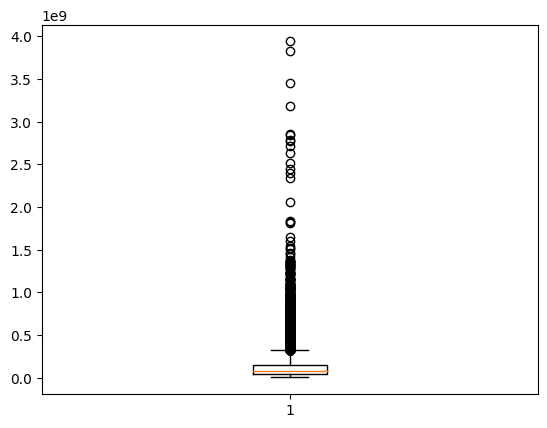

In [ ]:
q1 = cost['U99']['value'].quantile(.25)
q3 = cost['U99']['value'].quantile(.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

print((len(cost['U99'][cost['U99']['value'] > upper_bound]) / len(cost['U99']))*100)

plt.boxplot(cost['U99']['value'])
plt.show()

In [ ]:
cost['U99']

,Address,value
0,10001000108,151573000
1,10001000111,197480288
2,10001000114,43272000
3,10001000117,88918000
4,10001000120,59427000
...,...,...
19893,13006383810,33421000
19894,13006383814,27337000
19895,13006383815,6376666
19896,13006383820,48382750


In [ ]:
print(u99['U99P3S01'].code.value_counts())
print('----------------------------------')
print(u99['U99P3S02'].code.value_counts())
print('----------------------------------')
print(u99['U99P3S03'].code.value_counts())

#P3S02 --> drug

code
11731    18598
11441    18385
11724    17945
11732    17836
11231    16415
         ...  
11125       11
11239        6
11247        5
11319        4
11238        3
Name: count, Length: 194, dtype: int64
----------------------------------
code
22111    1640
22113    1499
Name: count, dtype: int64
----------------------------------
code
31251    1608
31312    1376
31216    1299
31212    1224
31222    1129
         ... 
31258      11
31311      11
31257       5
31119       4
31214       3
Name: count, Length: 82, dtype: int64


***  محاسبه مجموع هزینه های غیر خوراکی ***

In [ ]:
food_cost = {k : pd.DataFrame() for k in file_names}
food_cost['U99'] = pd.DataFrame(cost_sheet_divided['U99']['U99P3S01'].groupby('Address').agg({'value' : 'sum'})).reset_index()
food_cost['U99'].columns = ['Address', 'value']
food_cost['U99']

,Address,value
0,10001000108,12804000
1,10001000111,17347000
2,10001000114,5648000
3,10001000117,11091000
4,10001000120,10007000
...,...,...
19820,13006383810,5641000
19821,13006383814,6650000
19822,13006383815,1216666
19823,13006383820,6162750


In [ ]:
print(f"intersection = {len(set(list(food_cost['U99'].Address)) & set(list(cost['U99'].Address)))}")
print(f"len cost.Address = {len(cost['U99'].Address)}")
print(f"len food_cost.Address = {len(food_cost['U99'].Address)}")

intersection = 19825
len cost.Address = 19898
len food_cost.Address = 19825


In [ ]:
total_cost = {k : pd.DataFrame() for k in file_names}
total_cost['U99'] = pd.merge(cost['U99'], food_cost['U99'], how = 'outer', on = 'Address', )
total_cost['U99'].columns = ['Address', 'total_cost', 'edible_cost']
total_cost['U99'].loc[(total_cost['U99']['total_cost'].isna()) | (total_cost['U99']['edible_cost'].isna())]

,Address,total_cost,edible_cost
651,10102011814,9800000,NaN
656,10102011908,10750000,NaN
715,10103012923,5000000,NaN
875,10105015920,17050000,NaN
906,10105016507,13450000,NaN
...,...,...,...
19308,12907365215,4230000,NaN
19557,13001370823,11200000,NaN
19757,13001378623,10000000,NaN
19769,13001379209,9420000,NaN


Filling None value with median

In [ ]:
total_cost_median = total_cost['U99'][~total_cost['U99'].isna()].median()
total_cost['U99'].fillna(total_cost_median, inplace = True)

In [ ]:
total_cost['U99']['inedible_cost'] = total_cost['U99']['total_cost'] - total_cost['U99']['edible_cost']
total_cost['U99']

,Address,total_cost,edible_cost,inedible_cost
0,10001000108,151573000,12804000.0,138769000.0
1,10001000111,197480288,17347000.0,180133288.0
2,10001000114,43272000,5648000.0,37624000.0
3,10001000117,88918000,11091000.0,77827000.0
4,10001000120,59427000,10007000.0,49420000.0
...,...,...,...,...
19893,13006383810,33421000,5641000.0,27780000.0
19894,13006383814,27337000,6650000.0,20687000.0
19895,13006383815,6376666,1216666.0,5160000.0
19896,13006383820,48382750,6162750.0,42220000.0


In [ ]:
print(f"percentage of family with negative inedible_cost = {len(total_cost['U99'].loc[total_cost['U99']['inedible_cost'] < 0]) / len(total_cost['U99']) * 100}")

percentage of family with negative inedible_cost = 0.16082018293295808


In [ ]:
save_excel(total_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Total Cost For Each Family U99', 'xlsx')

OSError: Cannot save file into a non-existent directory: 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data'

***  محاسبه مجموع هزینه های حمل و نقل ***

In [ ]:
transportaion_codes = [71, 72, 72]
transportaion_cost = {k : pd.DataFrame() for k in file_names}

for code in transportaion_codes:
    new_cost = pd.DataFrame(u99['U99P3S13'][u99['U99P3S13']['code'].astype('str').str.startswith(f'{code}')])
    transportaion_cost['U99'] = pd.concat([transportaion_cost['U99'], new_cost])

transportaion_cost['U99']

,Address,code,value
750,10001001920,71314,500000
913,10005004613,71116,45000000
939,10009008508,71311,2000000
1090,10012010120,71116,850000000
1580,10010008920,71311,11000000
...,...,...,...
246267,13001375923,72119,2500000
246268,13001375923,72122,18000000
246285,13001369614,72117,4500000
246286,13001369614,72119,1000000


In [ ]:
transportaion_cost['U99'] = pd.DataFrame(transportaion_cost['U99'].groupby('Address').agg({'value' : 'sum'})).reset_index()
transportaion_cost['U99'].columns = ['Address', 'value']
transportaion_cost['U99']

,Address,value
0,10001000111,21400000
1,10001000117,21360000
2,10001000123,20800000
3,10001000211,4800000
4,10001000214,21100000
...,...,...
10720,13006383611,8100000
10721,13006383620,9600000
10722,13006383623,15700000
10723,13006383820,17900000


In [ ]:
save_excel(transportaion_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Transportation Cost U99', 'xlsx')